<a href="https://colab.research.google.com/github/adamsmax/Sigmoid-Neuron/blob/master/SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm import tqdm_notebook

In [0]:
def sigmoid(x,w,b):
  return 1/(1+np.exp(-(w*x + b)))

In [0]:
sigmoid(1,.5,0)

0.6224593312018546

<function matplotlib.pyplot.show>

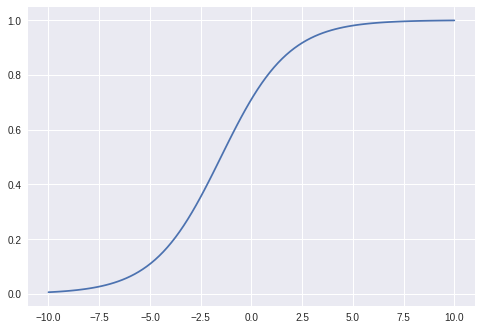

In [0]:
w=0.6   #@param {type: "slider", min: -2, max: 2,step:0.1}
b=0.9   #@param {type: "slider", min: -2, max: 2,step:0.1}
X=np.linspace(-10,10,100)
Y=sigmoid(X,w,b)
plt.plot(X,Y)
plt.show

In [0]:
type(X)

numpy.ndarray

In [0]:
type(Y)

numpy.ndarray

<function matplotlib.pyplot.show>

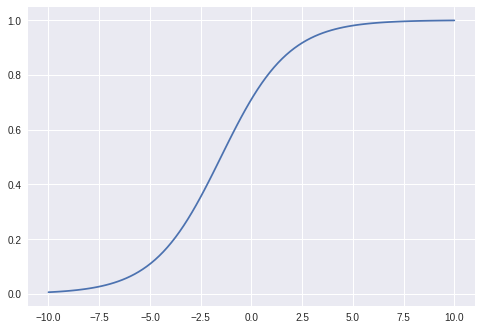

In [0]:
plt.plot(X,Y)
plt.show

In [0]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

In [0]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [0]:
from mpl_toolkits import mplot3d

In [0]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
XX1,XX2=np.meshgrid(X1,X2)
print(X1.shape,X2.shape,XX1.shape,XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1=0.5
w2=0.5
b=0
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

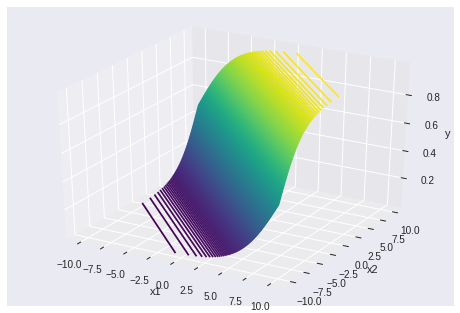

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1, XX2, Y, 200, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

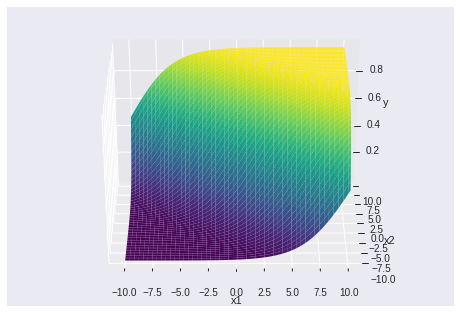

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

ax.view_init(30,270)

In [0]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

<function matplotlib.pyplot.show>

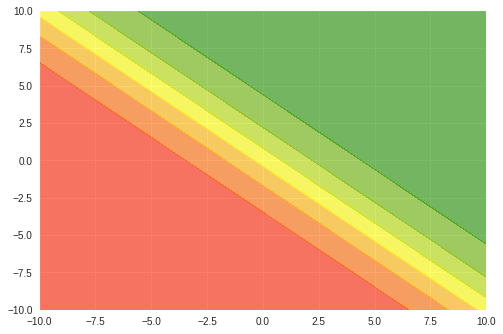

In [0]:
plt.contourf(XX1,XX2,Y,cmap=my_cmap,alpha=0.6)
plt.show

<function matplotlib.pyplot.show>

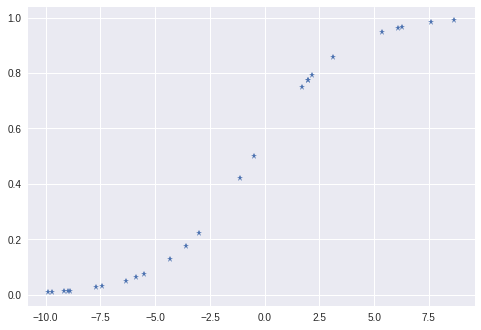

In [0]:
w_unknown=0.5
b_unknown=0.25
X=np.random.random(25)*20-10
Y=sigmoid(X,w_unknown,b_unknown)
plt.plot(X,Y,'*')
plt.show

In [0]:
def calculate_loss(X,Y,w_est,b_est):
  loss=0
  for x,y in zip(X,Y):
    loss+=(y-sigmoid(x,w_est,b_est))**2
  return loss

In [0]:
W=np.linspace(0,2,100)
B=np.linspace(-1,1,100)
WW,BB=np.meshgrid(W,B)
Loss=np.zeros(WW.shape)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i,j]=calculate_loss(X,Y,WW[i,j],BB[i,j])

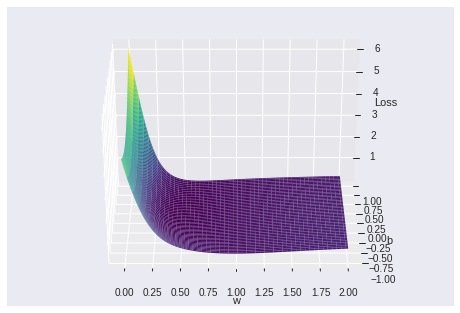

In [0]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss');

ax.view_init(30,270 )

In [0]:
ij=np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij-(i*Loss.shape[1]))
print(i,j)

62 25


In [0]:
print(WW[i,j],BB[i,j])

0.5050505050505051 0.2525252525252526


#Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  def __init__(self):
    self.w=None
    self.b=None
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b
  def sigmoid(self,x):
    return 1.0/(1.0+np.exp(-x))
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True,display_loss=False):
    if initialise:
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
    if display_loss:
      loss={}
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw+=self.grad_w(x,y)
        db+=self.grad_b(x,y)
      self.w-=learning_rate*dw
      self.b-=learning_rate*db
      if display_loss:
        Y_pred=self.sigmoid(self.perceptron(X))
        loss[i]=mean_squared_error(Y_pred,Y)
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=[1,1,1,0,0,0]

In [0]:
sn=SigmoidNeuron()
sn.fit(X,Y,1,0.25,True)

In [0]:
def plot_sn(X,Y,sn,ax):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  XX,XX2=np.meshgrid(X1,X2)
  YY=np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val=np.asarray([X1[j],X2[i]])
      YY[i,j]=sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.plot()

[[-1.0850828  -0.09891021]] [0.00392663]
[[-0.82090373 -0.30832661]] [0.04527425]
[[-0.44838418 -0.42978017]] [0.07071802]
[[ 0.21335625 -0.45019047]] [0.09288494]
[[ 0.65073832 -0.11972936]] [0.09519954]
[[ 0.73805323 -0.36122969]] [0.02312775]
[[ 0.91927264 -0.18945486]] [-0.03367107]
[[ 0.94153334 -0.42370058]] [-0.09820666]
[[ 1.08404685 -0.26571564]] [-0.14651902]
[[ 1.09969943 -0.43854692]] [-0.20088013]
[[ 1.19820001 -0.34610119]] [-0.24134143]
[[ 1.22512272 -0.43529804]] [-0.28368871]
[[ 1.28654614 -0.40912368]] [-0.31791101]
[[ 1.32231358 -0.44260985]] [-0.3513137]
[[ 1.36451421 -0.44729782]] [-0.38099746]
[[ 1.40012498 -0.46171615]] [-0.40887747]
[[ 1.43446361 -0.47201067]] [-0.43465494]
[[ 1.46634683 -0.48244815]] [-0.45873306]
[[ 1.496375   -0.49210735]] [-0.48126012]
[[ 1.52468896 -0.5012393 ]] [-0.5024084]
[[ 1.55147308 -0.50987603]] [-0.52231801]
[[ 1.57687706 -0.51806825]] [-0.54111118]
[[ 1.60103078 -0.52585775]] [-0.558894]
[[ 1.62404702 -0.53328095]] [-0.57575911]
[[

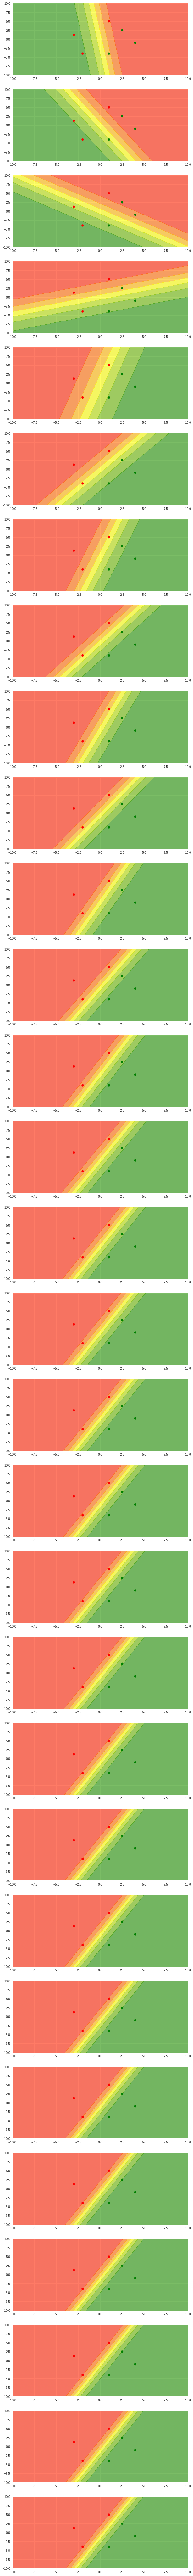

In [0]:
sn.fit(X,Y,1,0.05,True)
N=30
plt.figure(figsize=(10,N*5))
for i in range(N):
  print(sn.w,sn.b)
  ax=plt.subplot(N,1,i+1)
  plot_sn(X,Y,sn,ax)
  sn.fit(X,Y,1,0.5,False)

In [0]:
!ls

mobile_cleaned-1549119762886.csv  mobile_cleaned.csv  sample_data


In [0]:
data=pd.read_csv('mobile_cleaned.csv')

In [0]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,...,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,...,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,...,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,...,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,...,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,...,0,0,0,0,1,0,0,0,1,4.4


In [0]:
data.shape

(341, 88)

In [0]:
X=data.drop('Rating',axis=1)
Y=data['Rating'].values

In [0]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold=4.2
data['Class']=(data['Rating']>=threshold).astype(np.int)

In [0]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised=data['Class'].values

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [0]:
R=np.random.random([100,1])

In [0]:
R

array([[0.7269395 ],
       [0.47884213],
       [0.59902266],
       [0.65521772],
       [0.85934919],
       [0.10822291],
       [0.45681735],
       [0.35135571],
       [0.87707056],
       [0.05658233],
       [0.25204054],
       [0.12728922],
       [0.2382767 ],
       [0.92863513],
       [0.2836937 ],
       [0.6044433 ],
       [0.09078949],
       [0.78294178],
       [0.32939314],
       [0.13710125],
       [0.62473391],
       [0.84029187],
       [0.50458855],
       [0.04516648],
       [0.8446703 ],
       [0.90887105],
       [0.45029649],
       [0.80453518],
       [0.90556374],
       [0.80824619],
       [0.0483956 ],
       [0.00957489],
       [0.39552   ],
       [0.5931633 ],
       [0.56618946],
       [0.25773568],
       [0.78892985],
       [0.24136792],
       [0.87697604],
       [0.89369073],
       [0.90044313],
       [0.78345456],
       [0.11126824],
       [0.51278878],
       [0.11531526],
       [0.24161159],
       [0.00950577],
       [0.051

<function matplotlib.pyplot.show>

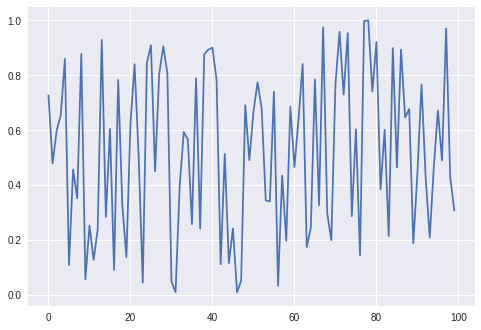

In [0]:
plt.plot(R)
plt.show

In [0]:
np.mean(R)

0.5235652276484142

In [0]:
np.std(R)

0.2913052592429735

In [0]:
scaler=StandardScaler()

In [0]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
rscaler.mean_

NameError: ignored

In [0]:
RT=scaler.transform(R)

In [0]:
np.mean(RT)

In [0]:
np.std(RT)

In [0]:
plt.plot(RT)
plt.show

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_binarised)

In [0]:
print(X_train.shape,X_test.shape)

In [0]:
scaler=StandardScaler()
X_scaled_train=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
minmax_scaler=MinMaxScaler()

In [0]:
Y_scaled_train=minmax_scaler.fit_transform(Y_train.reshape(-1,1))

In [0]:
np.min(Y_scaled_train)

0.0

In [0]:
Y_scaled_test=minmax_scaler.transform(Y_test.reshape(-1,1))

In [0]:
scaled_threshold=list(minmax_scaler.transform(np.array([threshold]).reshape(-1,1)))[0][0]

In [0]:
scaled_threshold

0.6800000000000002

In [0]:
Y_binarised_train=(Y_scaled_train>scaled_threshold).astype("int").ravel()

In [0]:
Y_binarised_train

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1])

In [0]:
Y_binarised_test=(Y_scaled_test>scaled_threshold).astype("int").ravel()

In [0]:
Y_binarised_test

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0])

In [0]:
sn=SigmoidNeuron()

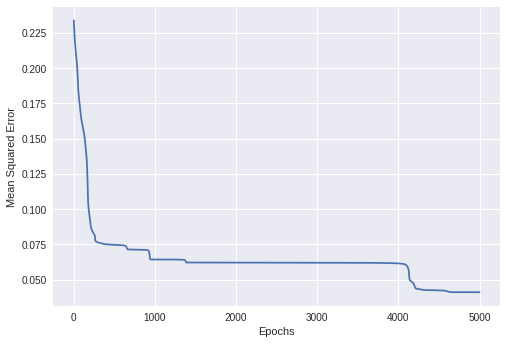

In [0]:
sn.fit(X_scaled_train,Y_scaled_train,epochs=5000,learning_rate=0.015,display_loss=True)

In [0]:
Y_pred_train=sn.predict(X_scaled_train)
Y_pred_test=sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train=(Y_pred_train>scaled_threshold).astype("int").ravel()
Y_pred_binarised_test=(Y_pred_test>scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train=accuracy_score(Y_pred_binarised_train,Y_binarised_train)
accuracy_test=accuracy_score(Y_pred_binarised_test,Y_binarised_test)

In [0]:
print(accuracy_train,accuracy_test)

0.7764705882352941 0.8023255813953488
